In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import Bgolearn.BGOsampling as BGOS

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


# It's a noise-free example/one-d

## 1 : input the dataset 

In [2]:
data = pd.read_csv('data.csv')
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [3]:
data

,x,y
0,0.5,6.322063
1,1.0,5.273000
2,1.5,4.694562
3,2.0,4.448000
4,2.5,4.414062
5,3.0,4.493000
6,3.5,4.604563
7,4.0,4.688000
8,4.5,4.702063
9,9.0,4.553000


In [4]:
x

,x
0,0.5
1,1.0
2,1.5
3,2.0
4,2.5
5,3.0
6,3.5
7,4.0
8,4.5
9,9.0


In [5]:
y

0     6.322063
1     5.273000
2     4.694562
3     4.448000
4     4.414062
5     4.493000
6     4.604563
7     4.688000
8     4.702063
9     4.553000
10    5.894563
11    8.000000
Name: y, dtype: float64

## 2 : design virtual space

In [6]:
# searching domain is [0,11]
# one-d
vs = np.linspace(0,11,111)
vs

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. ])

In [7]:
len(vs)

111

## the true function and initial data distribution

In [8]:
# true function 
def function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

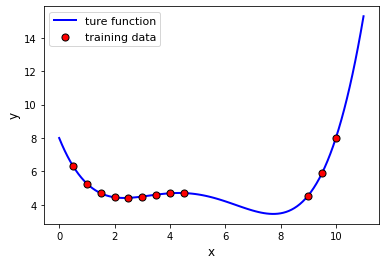

In [9]:

plt.figure()
ax1 = plt.subplot()
ax1.scatter(x,y,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(vs,function(vs),'b',lw=2,label="ture function")
plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

## 3 : give the next recommendation by Bgolearn

In [10]:
Bgolearn = BGOS.Bgolearn()

Mymodel = Bgolearn.fit(data_matrix = x,Measured_response = y , virtual_samples = vs)

# Expected Improvement method
score, data = Mymodel.EI()

The internal model is instantiated with homogenous noise: 1e-05
current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [6.4]


In [11]:
# score : the  assessment scores of Bgolearn by EI mothod for all the candidates, higher the better
score

array([5.04768331e-036, 1.87743872e-066, 3.01612491e-145, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.70842602e-185, 7.02030131e-090, 8.00572407e-044,
       3.55805392e-017, 8.90925717e-006, 3.04936655e-003, 7.92343251e-003,
       7.01599037e-003, 1.94738361e-003, 1.91293556e-005, 2.90898666e-010,
       3.72678834e-020, 5.82126642e-040, 7.79413435e-070, 2.33371474e-095,
       1.59697059e-118, 5.49193303e-164, 5.43289815e-262, 0.00000000e+000,
       0.00000000e+000, 1.23195608e-294, 6.31781947e-313, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.29589648e-147, 3.55967504e-104,
       2.02640634e-151, 0.00000000e+000, 1.67694168e-046, 6.95410408e-011,
       1.82318912e-005, 9.12219590e-004, 5.39317256e-003, 1.46543070e-002,
       2.77692501e-002, 4

In [12]:
# datum : the datum Bgolearn recommended which is most likely to be the minimun
data

array([[6.4]])

## 4 : verify the recommended datum and add the result into the dataset

In [13]:
# simulate an experiment
new_y = function(6.4)
new_y

3.9799808000000034

## 5 : about Bgolearn in step 3

+ if we want to define a specific regression model

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF

class My_Regressor(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        mdoel = GaussianProcessRegressor(kernel=RBF()).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std    

In [15]:
Bgolearn = BGOS.Bgolearn()

Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    Kriging_model = My_Regressor
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The external model is instantiated
current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [6.7]


+ Bgolearn can recommend n candidates at the same time

In [16]:
Bgolearn = BGOS.Bgolearn()

# for n = 3
Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    opt_num = 3
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The internal model is instantiated with homogenous noise: 1e-05
current optimal is : 4.4140625
The 1-th datum recomended by Expected Improvement : 
 x =  [6.3]
The 2-th datum recomended by Expected Improvement : 
 x =  [6.5]
The 3-th datum recomended by Expected Improvement : 
 x =  [6.4]


+ if we want to search the maximum 

In [17]:
Bgolearn = BGOS.Bgolearn()

Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    min_search = False
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The internal model is instantiated with homogenous noise: 1e-05
current optimal is : 8.0
The next datum recomended by Expected Improvement : 
 x =  [10.5]


+ if we want to test the fitting goodness of model on training dataset by Bgolearn

In [18]:
Bgolearn = BGOS.Bgolearn()

# by leave one out cross validation 
Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    CV_test = 'LOOCV'
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The internal model is instantiated with homogenous noise: 1e-05
Time consuming warning
LeaveOneOut Cross validation is applied
Fitting goodness on training dataset: 
  RMSE = 0.000151   MAE = 0.000122   R2 = 1.000000
Fitting goodness of LOOCV:
  RMSE = 0.592031   MAE = 0.295321   R2 = 0.671415
current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [6.4]


In [19]:
Bgolearn = BGOS.Bgolearn()

# by n-folds cross validation
# if n = 5
Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    CV_test = 5
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The internal model is instantiated with homogenous noise: 1e-05
Time consuming warning
5-folds Cross validation is applied
Fitting goodness on training dataset: 
  RMSE = 0.000151   MAE = 0.000122   R2 = 1.000000
Fitting goodness of 5-CVs:
  RMSE = 0.848805   MAE = 0.435063   R2 = 0.324578
current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [6.4]


+ if we want to use other acquisition function, e.g., Knowledge Gradient

In [20]:
Bgolearn = BGOS.Bgolearn()

Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,

)

# Expected Improvement method
score, data = Mymodel.Knowledge_G()

The internal model is instantiated with homogenous noise: 1e-05
The 2000-th Monte carol simulation
The 4000-th Monte carol simulation
The next datum recomended by Knowledge Gradient : 
 x =  [6.3]
